# Sentiment Analysis for Mental Health Status Classification (Advanced NLP Pipeline)
This notebook performs sentiment analysis on a dataset containing mental health statements and their corresponding labels. We'll preprocess the data, engineer useful features, vectorize the text using TF-IDF, and train a machine learning model to classify the mental health status.


In [ ]:
import pandas as pd
df = pd.read_csv("Sentiment_analysis_dataset.csv")
print(df.head())
df.dropna(inplace=True)

                                           Statement      Status
0  life doesn’t feel worth it that’s kind of it? ...  Depression
1  This life sucks and if it were for my religiou...  Depression
2  its been 9 months now for our marriage and she...      Stress
3  I do not feel particularly sad or anxious or a...  Depression
4  I am taking Venlafaxine. it is an SSRI. does n...  Depression


## 2. Visualize Class Distribution
We'll create a bar plot to visualize the distribution of different mental health categories in the dataset.


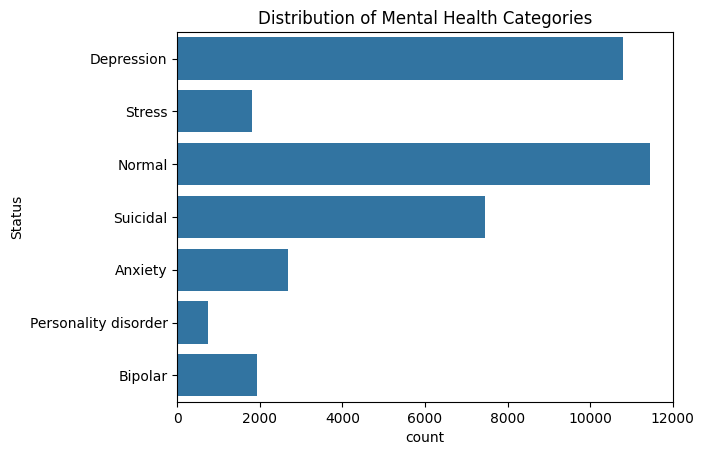

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y='Status', data=df)
plt.title("Distribution of Mental Health Categories")
plt.show()

## 3. Feature Engineering
Here we will create new features like text length, punctuation count, and sentiment polarity/subjectivity to prepare our dataset for model training.


In [ ]:
from textblob import TextBlob
import string

def extract_features(text):
    features = {}
    features['char_count'] = len(text)
    features['word_count'] = len(text.split())
    features['punctuation_count'] = sum([1 for c in text if c in string.punctuation])
    sentiment = TextBlob(text).sentiment
    features['polarity'] = sentiment.polarity
    features['subjectivity'] = sentiment.subjectivity
    return pd.Series(features)

engineered_features = df['Statement'].apply(extract_features)
df = pd.concat([df, engineered_features], axis=1)

## 4. Text Preprocessing
We'll clean the text data by removing URLs, mentions, hashtags, punctuation, and stopwords. We’ll also perform lemmatization to reduce words to their root form.


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\\S+|www\\S+|https\\S+', '', text)
    text = re.sub(r'\\@\\w+|\\#','', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\\w*\\d\\w*', '', text)
    text = re.sub(r'\\s+', ' ', text).strip()
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['Cleaned_Statement'] = df['Statement'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize

def liwc_categories_mental_health(text):
    categories = {
        'normal': [
            'fine', 'good', 'okay', 'happy', 'content', 'peaceful', 'cheerful', 'calm', 'relaxed', 'optimistic', 'balanced', 'healthy', 'active', 'satisfied', 'positive', 'functioning'
        ],
        'depression': [
            'hopeless', 'empty', 'cry', 'worthless', 'guilt', 'numb', 'fatigue', 'low energy', 'loss', 'withdraw', 'helpless', 'can’t move', 'tearful', 'pain', 'apathetic', 'no interest', 'depressed', 'sad', 'down', 'unmotivated', 'isolated', 'lonely', 'unhappy', 'grief', 'dark', 'broken'
        ],
        'suicidal': [
            'suicide', 'die', 'kill', 'ending', 'worthless', 'goodbye', 'no point', 'give up', 'cut', 'overdose', 'jump', 'hang', 'self-harm', 'suffer', 'can’t go on', 'sleep forever', 'end it', 'no hope', 'end my life', 'die alone', 'darkness', 'gone', 'finished', 'out of control', 'worthless'
        ],
        'anxiety': [
            'worry', 'nervous', 'panic', 'afraid', 'fear', 'anxious', 'shaky', 'sweating', 'racing heart', 'tight chest', 'uneasy', 'paranoid', 'dread', 'tremble', 'startle', 'restless', 'overthinking', 'unsure', 'numb', 'choking', 'breathless', 'tension', 'distressed', 'agitated', 'uneasiness'
        ],
        'stress': [
            'tired', 'burnout', 'overwhelmed', 'panic', 'deadline', 'exhausted', 'pressure', 'frantic', 'nervous', 'stressed', 'headache', 'can’t cope', 'too much', 'loaded', 'frustrated', 'exhaustion', 'broken down', 'done', 'run out', 'saturated', 'strained', 'high pressure', 'crushed'
        ],
        'bipolar': [
            'manic', 'high', 'low', 'rapid', 'mood swings', 'energy', 'impulsive', 'euphoria', 'reckless', 'irritable', 'depressed', 'racing thoughts', 'talkative', 'sleepless', 'distracted', 'hyperactive', 'impulsivity', 'energetic', 'unstable', 'unstable mood', 'mania', 'mixed state', 'elevated', 'overactive'
        ],
        'personality_disorder': [
            'abandon', 'emptiness', 'unstable', 'identity', 'intense', 'rage', 'clingy', 'split', 'self-image', 'impulsive', 'manipulative', 'paranoia', 'dependency', 'alienation', 'volatile', 'unstable relationships', 'fear of abandonment', 'rejection', 'self-destructive', 'confused', 'emotional', 'desperate', 'identity crisis', 'controlling', 'manipulation', 'self-worth', 'borderline', 'narcissistic'
        ]
    }
    counts = {f'liwc_{cat}': 0 for cat in categories}
    tokens = word_tokenize(text.lower())
    
    for token in tokens:
        for cat, words in categories.items():
            if token in words:
                counts[f'liwc_{cat}'] += 1
                
    return pd.Series(counts)

df = df.join(df['Statement'].apply(liwc_categories_mental_health))
liwc_weight = 5000
liwc_cols = [col for col in df.columns if col.startswith('liwc_')]
df[liwc_cols] = df[liwc_cols] * liwc_weight

## 5. Encode Labels
We’ll encode the target variable "Status" into numeric labels using **Label Encoding** for model training.


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Status'])

## 6. TF-IDF Vectorization
We’ll use **TF-IDF** to convert the cleaned text data into numerical form.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=4000, ngram_range=(1,2))
tfidf_features = vectorizer.fit_transform(df['Cleaned_Statement'])

## 7. Combine TF-IDF with Engineered Features
Now we’ll combine the TF-IDF features with the engineered features (e.g., char count, word count, sentiment polarity/subjectivity) for a more comprehensive input to the model.


In [ ]:
X = np.hstack((tfidf_features.toarray(), df[['char_count','word_count','punctuation_count','polarity','subjectivity']].values))
y = df['Label']

## 8. Train-Test Split 
We’ll split the data into training and testing sets (80% for training, 20% for testing).


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 9. SMOTE

We'll apply SMOTE to resolve any imbalance issues in our dataset

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print("Original class distribution:", Counter(y_train))

smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)
print("Resampled class distribution:", Counter(y_train))

X_test, y_test = smote.fit_resample(X_test, y_test)

Original class distribution: Counter({3: 9152, 2: 8626, 6: 5964, 0: 2153, 1: 1553, 5: 1447, 4: 605})
Resampled class distribution: Counter({3: 9152, 2: 9152, 6: 9152, 4: 9152, 5: 9152, 0: 9152, 1: 9152})


# 10. Model Training with cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 11. Model Evaluation
We’ll evaluate the model using various metrics: classification report, accuracy score, and confusion matrix.


Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.82      0.74      0.78       538
             Bipolar       0.79      0.70      0.74       388
          Depression       0.65      0.70      0.68      2157
              Normal       0.87      0.93      0.90      2288
Personality disorder       0.93      0.47      0.63       151
              Stress       0.69      0.41      0.51       362
            Suicidal       0.62      0.62      0.62      1492

            accuracy                           0.74      7376
           macro avg       0.77      0.65      0.69      7376
        weighted avg       0.74      0.74      0.74      7376

Accuracy Score: 0.7406453362255966
F1 Score: 0.7367413450374964


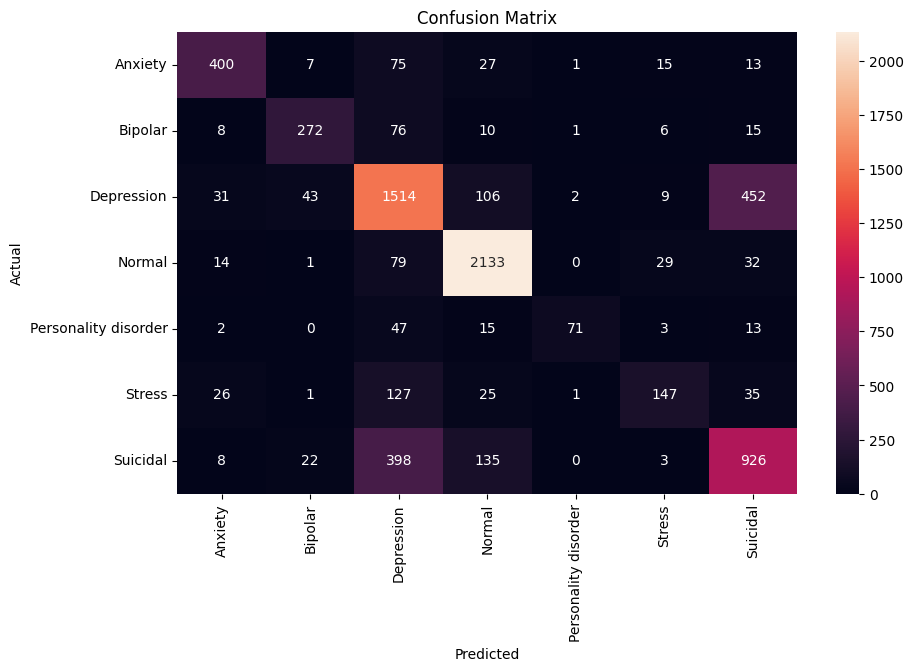

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# We can do better, Use xgboost


Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.82      0.76      0.79       538
             Bipolar       0.85      0.74      0.79       388
          Depression       0.71      0.70      0.70      2157
              Normal       0.88      0.94      0.91      2288
Personality disorder       0.84      0.53      0.65       151
              Stress       0.56      0.58      0.57       362
            Suicidal       0.64      0.64      0.64      1492

            accuracy                           0.76      7376
           macro avg       0.76      0.70      0.72      7376
        weighted avg       0.76      0.76      0.76      7376

Accuracy Score: 0.7596258134490239
F1 Score: 0.757844241201128


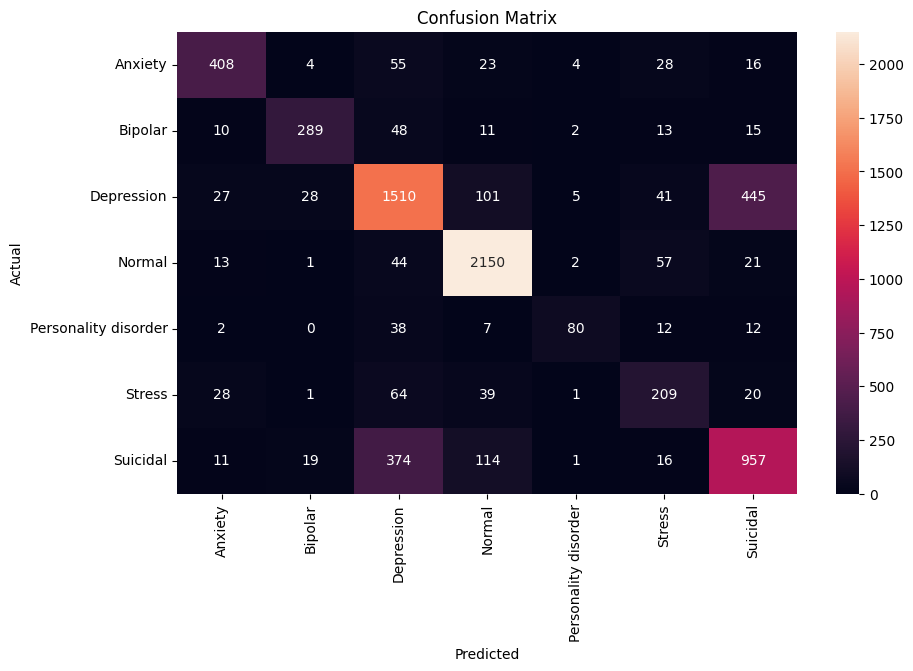

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Utilize grid search for hyperparameter tuning for xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
y_pred_best = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best, average='weighted'))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 3 folds for each of 54 candidates, totalling 162 fits
